# Laboratory #9 : Object Detection with YOLO

At the end of this laboratory, you would get familiarized with

*   Object Detection
*   YOLO for Object Detection using Keras and TensorFlow

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Add sufficient comments and explanations wherever necessary.
*   **Once you have the code completed, use GPU to train model faster.**

---

# YOLOv3 for Object Detection

*   There are several open source implementations of each version of YOLO.
*   For this exercise, we would not be implementing the YOLO from scratch as it is a challenging model and requires many customized elements.
*   We would use an open source implementation of YOLOv3 available from Python Lessons github repo, implemented with TensorFlow 2.x.
*   More details about YOLO can be found [here](https://pjreddie.com/darknet/yolo/). Refer the site and also the [paper](https://pjreddie.com/media/files/papers/YOLOv3.pdf) for better understanding.

## Clone the repo in the notebook

In [1]:
! git clone --recursive https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3.git

Clonando en 'TensorFlow-2.x-YOLOv3'...
remote: Enumerating objects: 806, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 806 (delta 3), reused 10 (delta 1), pack-reused 791
Recibiendo objetos: 100% (806/806), 70.80 MiB | 2.79 MiB/s, listo.
Resolviendo deltas: 100% (470/470), listo.


In [1]:
# navigate to the cloned repository

%cd TensorFlow-2.x-YOLOv3/

/home/alberto/Documentos/GitHub/YOLO_Object_Detection/TensorFlow-2.x-YOLOv3


In [7]:
# installing additional requirements using pip

! pip install -r requirements.txt

# Please note that some libraries would return error. 
# If they are not important dependecies, you can skip those errors.
# Pip installation might require restarting the notebook. 
# Follow the installation output

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 798.6 kB/s eta 0:00:00a 0:00:01
  Using cached wget-3.2.zip (10 kB)
  Preparing metadata (setup.py) ... done
  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 MB 4.2 MB/s eta 0:00:0000:0100:01
  Using cached tqdm-4.43.0-py2.py3-none-any.whl (59 kB)
  Using cached mss-9.0.1-py3-none-any.whl (22 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached docutils-0.16-py2.py3-none-any.whl (548 kB)
  Using cached s3transfer-0.8.2-py3-none-any.whl.metadata (1.8 kB)
  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
  Using cached rsa-4.7.2-py3-none-any.whl (34 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
  Using cached urllib3-1.26.18-py2.py3-none-any.whl.metadata (48 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━

In [8]:
# check gpu availability

import tensorflow as tf
tf.test.gpu_device_name()

2023-12-03 11:00:03.653695: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-03 11:00:03.653821: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-03 11:00:03.653871: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-03 11:00:03.653950: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-03 11:00:03.654014: I tensorflow/compiler/xla/stream_executo

'/device:GPU:0'

In [9]:
# get tensorflow version

tf.__version__

'2.11.0'

## Loading pre-trained weights

*   Load the weights using any one of the methods

In [5]:
#  download the weights to the filesystem 
# (Remember that this would not be persistent)
# If you need the weights to be persistent, upload the weights to your drive
# and load from the drive

# ! wget -P model_data https://pjreddie.com/media/files/yolov3.weights

## Detecting objects in images

*   Run sample predictions using the pre-trained weights

In [10]:
from yolov3.utils import detect_image, Load_Yolo_model
from yolov3.configs import *

image_path = "./IMAGES/kite.jpg"
output_path = "./kite_pred.jpg"

yolo = Load_Yolo_model()

kite_predictions = detect_image(
    yolo, 
    image_path, 
    output_path, 
    input_size=YOLO_INPUT_SIZE, 
    show=False, 
    rectangle_colors=(255,0,0))

# You will find the predictions file saved in the output path
# all objects present in MS-COCO classes would be detected in the saved file

GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Loading Darknet_weights from: model_data/yolov3.weights


2023-12-03 11:02:32.753971: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-03 11:02:32.754089: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-03 11:02:32.754139: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-03 11:02:32.761800: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-03 11:02:32.761903: I tensorflow/compiler/xla/stream_executo

1/1 [==============================] - 2s 2s/step


## Understanding Image Detection function

*   In this exercise, you have to write your own function for object detection (Each step would lead to replicating the existing function)

*   Load the input image and visualize the image using matplotlib
*   Please note that image read is different in matplotlib, skimage and opencv. You will need to do appropriate conversion if using opencv

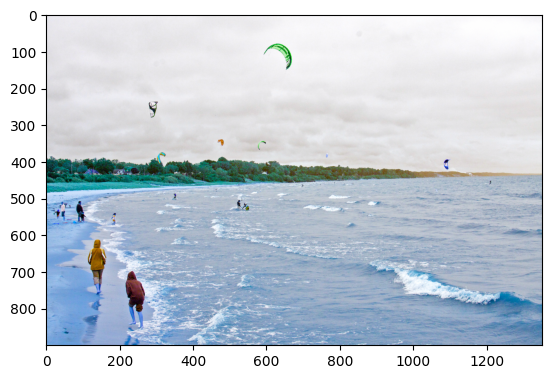

In [11]:
# solution
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(image_path)
plt.imshow(image)


*   Load the configurations

In [12]:
# open the configs.py file to understand the different configuration parameters

from yolov3.configs import *

*   Load the pre-trained weights using the Load_Yolo_model fuction available in yolov3.utils

In [13]:
from yolov3.utils import Load_Yolo_model

yolo = Load_Yolo_model()

GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Loading Darknet_weights from: model_data/yolov3.weights


In [14]:
yolo.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 416, 416, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 416, 416, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 416, 416, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

*   Preprocess the image according to the network to be used

In [15]:
import numpy as np
from yolov3.utils import image_preprocess

image_data = image_preprocess(np.copy(image), [YOLO_INPUT_SIZE, YOLO_INPUT_SIZE])
image_data = image_data[np.newaxis, ...].astype(np.float32)

print('Original image:', image.shape)
print('Processed image:', image_data.shape)

Original image: (900, 1352, 3)
Processed image: (1, 416, 416, 3)


### Prediction boxes

*   Predict bounding boxes using the predict method 

In [16]:
pred_bbox = yolo.predict(image_data)
orig_pred = pred_bbox.copy()

1/1 [==============================] - 1s 554ms/step


*   Get the prediction statistics

In [17]:
print('Length of the prediction boxes =', len(pred_bbox))
print('Shape of each prediction box ')

for i in range(len(pred_bbox)):
    print('Shape of prediction box', i, 'is', pred_bbox[i].shape)

Length of the prediction boxes = 3
Shape of each prediction box 
Shape of prediction box 0 is (1, 52, 52, 3, 85)
Shape of prediction box 1 is (1, 26, 26, 3, 85)
Shape of prediction box 2 is (1, 13, 13, 3, 85)


In [18]:
print(f"There are {YOLO_COCO_CLASSES} classes in MS-COCO dataset used to train yolov3")

There are model_data/coco/coco.names classes in MS-COCO dataset used to train yolov3


*   Why is the length of prediction boxes 3?

In [19]:
size = YOLO_INPUT_SIZE
print(f"YOLO_INPUT_SIZE = {size}x{size}")
box_sizes = [pred_bbox[i].shape[1] for i in range(len(pred_bbox))]
print(f"First prediction box divides the image in {box_sizes[0]}x{box_sizes[0]}x3 cells of size {size//box_sizes[0]}x{size//box_sizes[0]}x3")
print(f"Second prediction box divides the image in {box_sizes[1]}x{box_sizes[1]}x3 cells of size {size//box_sizes[1]}x{size//box_sizes[1]}x3")
print(f"Third prediction box divides the image in {box_sizes[2]}x{box_sizes[2]}x3 cells of size {size//box_sizes[2]}x{size//box_sizes[2]}x3")

YOLO_INPUT_SIZE = 416x416
First prediction box divides the image in 52x52x3 cells of size 8x8x3
Second prediction box divides the image in 26x26x3 cells of size 16x16x3
Third prediction box divides the image in 13x13x3 cells of size 32x32x3


As shown in the following plots, the higher resolution box can predict every object in the image- The second one, can only identify the largest ones and the third can't identify any.

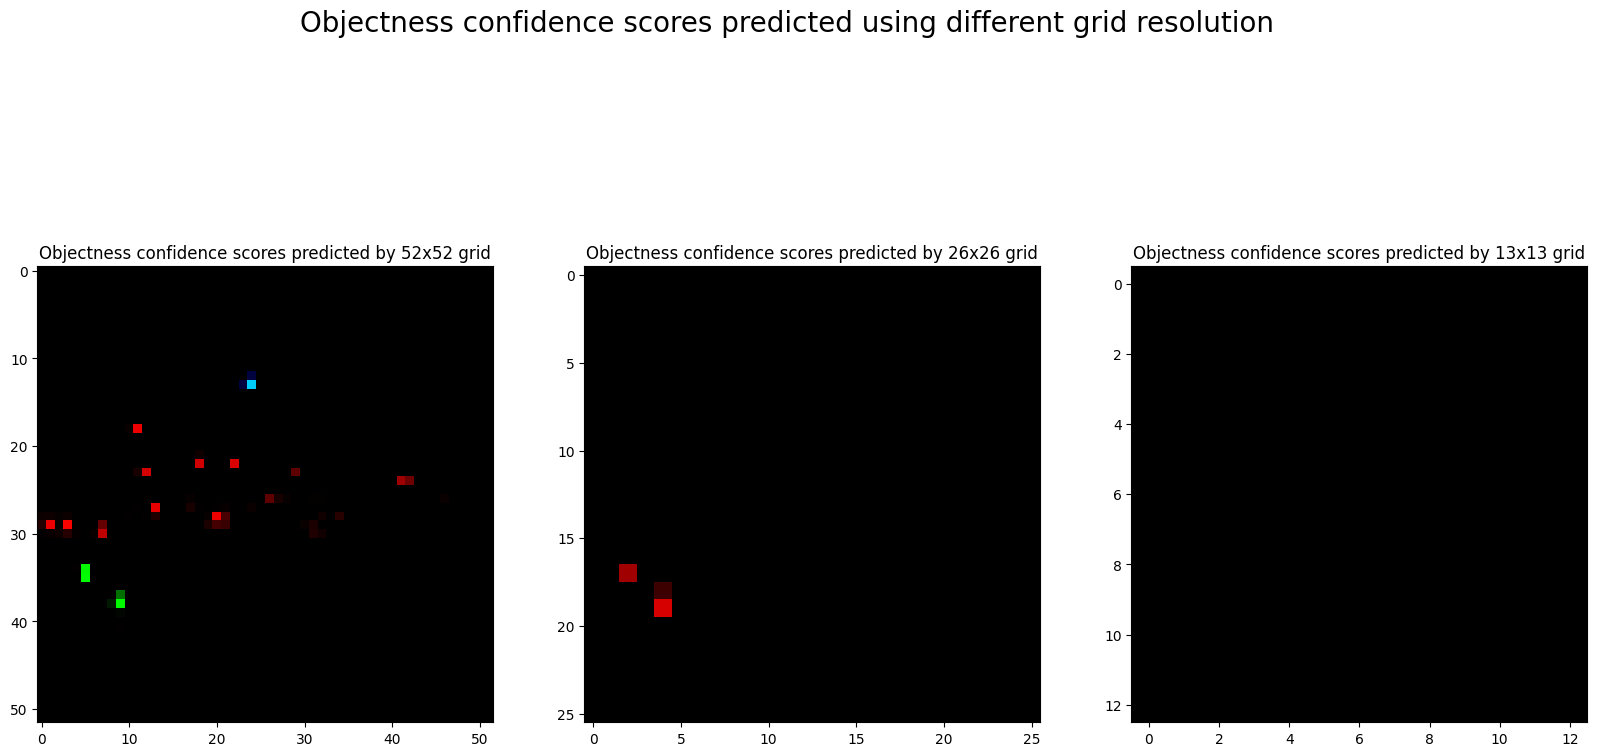

In [23]:
pred_reshape_52 = orig_pred[0][0].reshape(-1, 85)

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(orig_pred[0][0][:, :, :, 4])
ax[0].set_title("Objectness confidence scores predicted by 52x52 grid")

ax[1].imshow(orig_pred[1][0][:, :, :, 4])
ax[1].set_title("Objectness confidence scores predicted by 26x26 grid")

ax[2].imshow(orig_pred[2][0][:, :, :, 4])
ax[2].set_title("Objectness confidence scores predicted by 13x13 grid")

fig.suptitle("Objectness confidence scores predicted using different grid resolution", fontsize=20);


**Solution**

The length of prediction boxes is typically 3 because it represents the three scales or resolutions at which object detection is performed. This multi-scale approach allows the object detector to detect objects of different sizes, from small objects like pedestrians to large objects like cars and buildings. 

It means, basically, the number of cells the original image is divided into. The more cells, the more accurate the detection, but also the slower the process. The number of cells is usually 13x13, 26x26 or 52x52.

From the YOLOv3 paper:

>2.3. Predictions Across Scales

>>YOLOv3 predicts boxes at 3 different scales. Our system extracts features from those scales using a similar concept to feature pyramid networks. From our base feature extractor we add several convolutional layers. The last
of these predicts a 3-d tensor encoding bounding box, objectness, and class predictions. In our experiments with
COCO we predict 3 boxes at each scale so the tensor is
N × N × [3 ∗ (4 + 1 + 80)] for the 4 bounding box offsets,
1 objectness prediction, and 80 class predictions.

* Prediction Box 0 (52x52): This prediction box is responsible for detecting small objects. It has a higher spatial resolution (smaller grid cells) compared to the other two prediction boxes, which allows it to localize small objects with greater precision.

* Prediction Box 1 (26x26): This prediction box is responsible for detecting medium-sized objects. It has a medium spatial resolution, suitable for detecting objects of moderate size.

* Prediction Box 2 (13x13): This prediction box is responsible for detecting large objects. It has a lower spatial resolution (larger grid cells) compared to the other two prediction boxes, which allows it to capture the overall shape and context of large objects.

By using three prediction boxes at different scales, the object detector can effectively detect objects of varying sizes, improving the overall accuracy of the object detection system.

*   What does the shape of each prediction box represent?
*   Which layer corresponds to each prediction box output?

**Solution**

From the YOLOv3 paper:

>2.3. Predictions Across Scales

>>YOLOv3 predicts boxes at 3 different scales. Our system extracts features from those scales using a similar concept to feature pyramid networks [8]. From our base feature extractor we add several convolutional layers. The last
of these predicts a 3-d tensor encoding bounding box, objectness, and class predictions. In our experiments with
COCO [10] we predict 3 boxes at each scale so the tensor is
N × N × [3 ∗ (4 + 1 + 80)] for the 4 bounding box offsets,
1 objectness prediction, and 80 class predictions.


shape = (1, height, width, num_anchors, num_classes (80) + bounding_box_offsets (4) + objectness_score (1))

* First dimension: Batch size. The number of images predicted at once.

* height: This represents the height of the prediction box in terms of the number of grid cells. The height can vary depending on the specific object detection model and the input image size.

* width: This represents the width of the prediction box in terms of the number of grid cells. Similar to height, the width can vary depending on the model and input image size.

* num_channels: This represents the number of channels in the prediction box's feature representation. Typically, num_channels is set to 3, corresponding to the RGB color channels of the input image.

* num_classes: This represents the number of object classes that the prediction box can predict.

* bounding_box_offsets: The network predicts 4 coordinates for each bounding box, $t_x$, $t_y$, $t_w$, $t_h$. If the cell is offset from the top left corner of the image by $(c_x, c_y)$ and the bounding box prior has width and height $p_w$, $p_h$, then the predictions correspond to:

$$
b_x = σ(t_x) + c_x\\
b_y = σ(t_y) + c_y\\
b_w = p_we^{t_w}\\
b_h = p_he^{t_h}\\
$$

* objectness_score: YOLOv3 predicts an objectness score for each bounding box using logistic regression. This should be 1 if the bounding box prior overlaps a ground truth object by more than any other bounding box prior

**Question**
*   What does 85 represent in the last dimension of the prediction box shape?

**Solution**


Answered above: 80 classes + 4 bounding box offsets + 1 objectness score

*   What is the aim in having three prediction boxes array?
*   Why is it helpful?

**Solution**

Answered above. By using three prediction boxes at different scales, the object detector can effectively detect objects of varying sizes, improving the overall accuracy of the object detection system.

*   Reshape the prediction boxes

In [24]:
import tensorflow as tf

pred_bbox = [tf.reshape(x, (-1, tf.shape(x)[-1])) for x in pred_bbox]
pred_bbox = tf.concat(pred_bbox, axis=0)

print(pred_bbox.shape)

(10647, 85)


*   What do you think happens in the previous cell (reshaping the prediction boxes)? Explain the code as per your understanding.
*   Why do you think this step is needed?

In [16]:
52 * 52 * 3 + 26 * 26 * 3 + 13 * 13 * 3

10647

**Solution**

We have 3 different grids formed by 52x52x3, 26x26x3 and 13x13x3 cells respectively. The number of rows now is

$$
52 * 52 * 3 + 26 * 26 * 3 + 13 * 13 * 3 = 10647
$$

So each row represents a cell (anchor box) in the different resolutions.

This reshape allows us to easily manipulate the prediction boxes and have our problem in the classic format of a classification problem. This way, each cell is a cell and the prediction are the position of the centers of the bounding boxes, the width and height of the bounding boxes, the objectness score and the class probabilities.

Each cell is now labeled.

*   What are anchor boxes? What is the significance of anchor boxes in YOLO?

**Solution**

Object detectors using YOLOv3 usually predict log-space transforms, which are offsets to predefined “default” bounding boxes. Those specific bounding boxes are called anchors. The transforms are later applied to the anchor boxes to receive a prediction. These boxes are defined to capture the scale and aspect ratio of specific object classes.

Anchors are determined by a k-means procedure, looking at all the bounding boxes in your dataset. For YOLO, the significance of anchor boxes is to predicts the offset of the tx,tw,pw, the coordinates bx,by, bw and bh of the grid.

From YOLOv3 paper:
>Following YOLO9000 our system predicts bounding boxes using dimension clusters as anchor boxes

*   Post process the prediction bounding boxes

In [33]:
from yolov3.utils import postprocess_boxes

score_threshold = 0.3

bboxes = postprocess_boxes(pred_bbox, image, YOLO_INPUT_SIZE, score_threshold)

In [55]:
valid_scale=[0, np.inf]
pred_bbox = np.array(pred_bbox)

pred_xywh = pred_bbox[:, 0:4]
pred_conf = pred_bbox[:, 4]
pred_prob = pred_bbox[:, 5:]

# 1. (x, y, w, h) --> (xmin, ymin, xmax, ymax)
pred_coor = np.concatenate([pred_xywh[:, :2] - pred_xywh[:, 2:] * 0.5,
                            pred_xywh[:, :2] + pred_xywh[:, 2:] * 0.5], axis=-1)


In [26]:
len(bboxes)

21

*   What is score threshold? What is the role of score threshold?

**Solution**

Score threshold is used to filter out the predicted boxes with low scores, where these are defined as objectness confidence times the probability of the most likely predicted class.

*   What happens when the score_threshold is low? What happens when it is high?

**Solution**

if it's low, the number of predicted boxes is higher and the accuracy is lower. If it's high, the number of predicted boxes is lower but predictions will be more confident. It's a measure of how confident we want our predictions to be.

For example, if we want to avoid the amount of false positives, we can increase the score threshold. If we want to avoid the amount of false negatives, we can decrease the score threshold.

### Non-maximum Supression

*   What is non-maximum supression? Why is it needed?
*   What happens in this step?

**Solution**

**Non-maximum suppression (NMS)** is a technique commonly used in object detection algorithms to eliminate overlapping or redundant bounding boxes and refine the final detections. It is a critical step in the object detection pipeline, ensuring that the output is accurate and consistent.

**Why is NMS Needed?**

Object detection algorithms often produce multiple bounding boxes for the same object due to their inherent nature. These multiple detections can arise from various factors, such as the algorithm's confidence score threshold, the use of multiple scales or anchor boxes, and the presence of similar objects in close proximity.

NMS addresses this issue by selecting the most confident and representative bounding box for each object while eliminating the overlapping or redundant ones. This process ensures that the output contains only the most likely and accurate detections, reducing clutter and improving the overall quality of the object detection results.

**What Happens in NMS?**

NMS operates on a set of bounding boxes, typically sorted by their confidence scores. It iteratively selects the bounding box with the highest confidence score and suppresses any overlapping boxes beyond a certain threshold. The threshold, often referred to as the intersection-over-union (IoU) threshold, determines the degree of overlap that triggers suppression.

The suppression process involves setting the confidence scores of the overlapping boxes to zero, effectively removing them from the output. This process continues until all bounding boxes have been processed, resulting in a refined set of detections that are non-overlapping and represent the most confident predictions for each object.

**Impact of NMS on Object Detection**

NMS plays a crucial role in object detection by refining the output and improving its overall quality. It helps to:

- Reduce clutter and redundancy in the detections
- Enhance the accuracy of object localization
- Improve the overall consistency of the detection results

Without NMS, object detection algorithms would produce a cluttered and inaccurate set of detections, making it difficult to interpret the results and identify objects reliably. NMS ensures that the output is clean, accurate, and consistent, making object detection more reliable and effective in real-world applications.

*   Apply NMS on the bounding boxes.

In [56]:
from yolov3.utils import nms

iou_threshold = 0.45

bboxes = nms(bboxes, iou_threshold, method='nms')

In [57]:
len(bboxes)

15

*   What is the role of IoU Threshold? What happens when a IoU higher threshold is used?

**Solution**

The intersection-over-union (IoU) threshold plays a critical role in non-maximum suppression (NMS), a technique used to refine object detection results by eliminating overlapping or redundant bounding boxes. The IoU threshold determines the degree of overlap that triggers suppression of a bounding box relative to the highest-confidence box.

**Role of IoU Threshold**

The IoU threshold serves as a threshold for determining the overlap between bounding boxes. When the IoU between two bounding boxes exceeds the threshold, the one with a lower confidence score is suppressed. This ensures that only the most confident and representative bounding box for each object is retained in the final output.

**Impact of Higher IoU Threshold**

Using a higher IoU threshold results in a more conservative suppression approach. Only bounding boxes with a significantly high degree of overlap will be suppressed, leading to a smaller number of final detections. This can potentially improve the precision of the object detection results, reducing false positives. However, it may also lead to missed detections, particularly for objects that are located close together or have similar appearances.

The choice of IoU threshold depends on the specific application and the desired balance between precision and recall. A higher threshold prioritizes precision, reducing false positives but potentially increasing missed detections. A lower threshold prioritizes recall, reducing missed detections but potentially increasing false positives.

In [28]:
#  draw the predicted bounding boxes on the image

from yolov3.utils import draw_bbox

pred_image = draw_bbox(image, bboxes, CLASSES=YOLO_COCO_CLASSES, rectangle_colors='')

### Predicting output

*   Visualize the pred_image using matplotlib

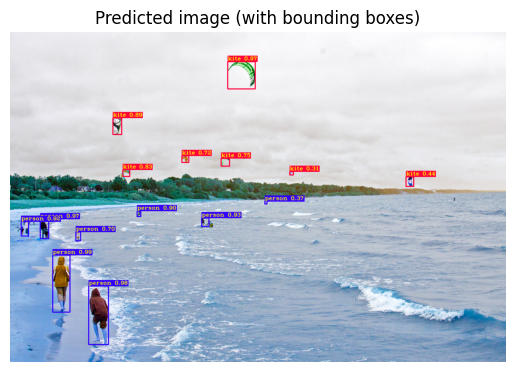

In [29]:
# solution

plt.imshow(pred_image)
plt.title("Predicted image (with bounding boxes)")
plt.axis("off");

# YOLO training

*   In this exercise, the task is to train mnist dataset using YOLOv3-Tiny model
*   Load the YOLOv3-Tiny weights using any one of the methods
*   For this experiment, we would use MNIST as the training data
*   Please note that all the necessary code is already available in the repo

In [25]:
# download the weights to the filesystem 
# (Remember that this would not be persistent)

! wget -P model_data https://pjreddie.com/media/files/yolov3-tiny.weights

--2023-12-03 00:57:57--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolviendo pjreddie.com (pjreddie.com)... falló: Fallo temporal en la resolución del nombre.
wget: no se pudo resolver la dirección del equipo ‘pjreddie.com’


### Prepare data

*   The model takes a long time to train even with GPU. In order to fasten the training process, let us change the number of training and testing images in **mnist/make_data.py** file.
```
images_num_train = 500  # line number 20 in make_data.py
images_num_test = 50  # line number 21 in make_data.py
```
*   PS: 
    *   The dataset is already available in the repository.
    *   The file can be opened by double clicking on the filename from the Files menu.


*   Prepare the dataset for training

In [30]:
! python mnist/make_data.py

=> /home/alberto/Documentos/GitHub/YOLO_Object_Detection/TensorFlow-2.x-YOLOv3/mnist/mnist_train/000001.jpg 397,274,411,288,8 236,246,258,268,7 48,63,70,85,2 76,277,118,319,1 7,172,49,214,4 65,68,177,180,5 179,49,291,161,0 274,277,386,389,0
=> /home/alberto/Documentos/GitHub/YOLO_Object_Detection/TensorFlow-2.x-YOLOv3/mnist/mnist_train/000002.jpg 64,149,86,171,8 136,396,150,410,5 87,316,143,372,8 207,319,263,375,9 309,15,365,71,1 273,13,301,41,9 311,204,395,288,0 89,172,173,256,4
=> /home/alberto/Documentos/GitHub/YOLO_Object_Detection/TensorFlow-2.x-YOLOv3/mnist/mnist_train/000003.jpg 361,246,383,268,9
=> /home/alberto/Documentos/GitHub/YOLO_Object_Detection/TensorFlow-2.x-YOLOv3/mnist/mnist_train/000004.jpg 317,310,345,338,4 167,180,223,236,5 379,311,407,339,2 139,320,223,404,7
=> /home/alberto/Documentos/GitHub/YOLO_Object_Detection/TensorFlow-2.x-YOLOv3/mnist/mnist_train/000005.jpg 143,258,255,370,0 215,90,327,202,8 9,23,121,135,7
=> /home/alberto/Documentos/GitHub/YOLO_Object_Dete

### Tensorboard Visualization

*   Tensorboard is a visualization toolkit that allows for tracking and visualizing metrics such as loss and accuracy.
*   We would get introduced to tensorboard visualization here.
*   More information can be seen [here](https://www.tensorflow.org/tensorboard)

In [27]:
# Load the TensorBoard notebook extension

%load_ext tensorboard

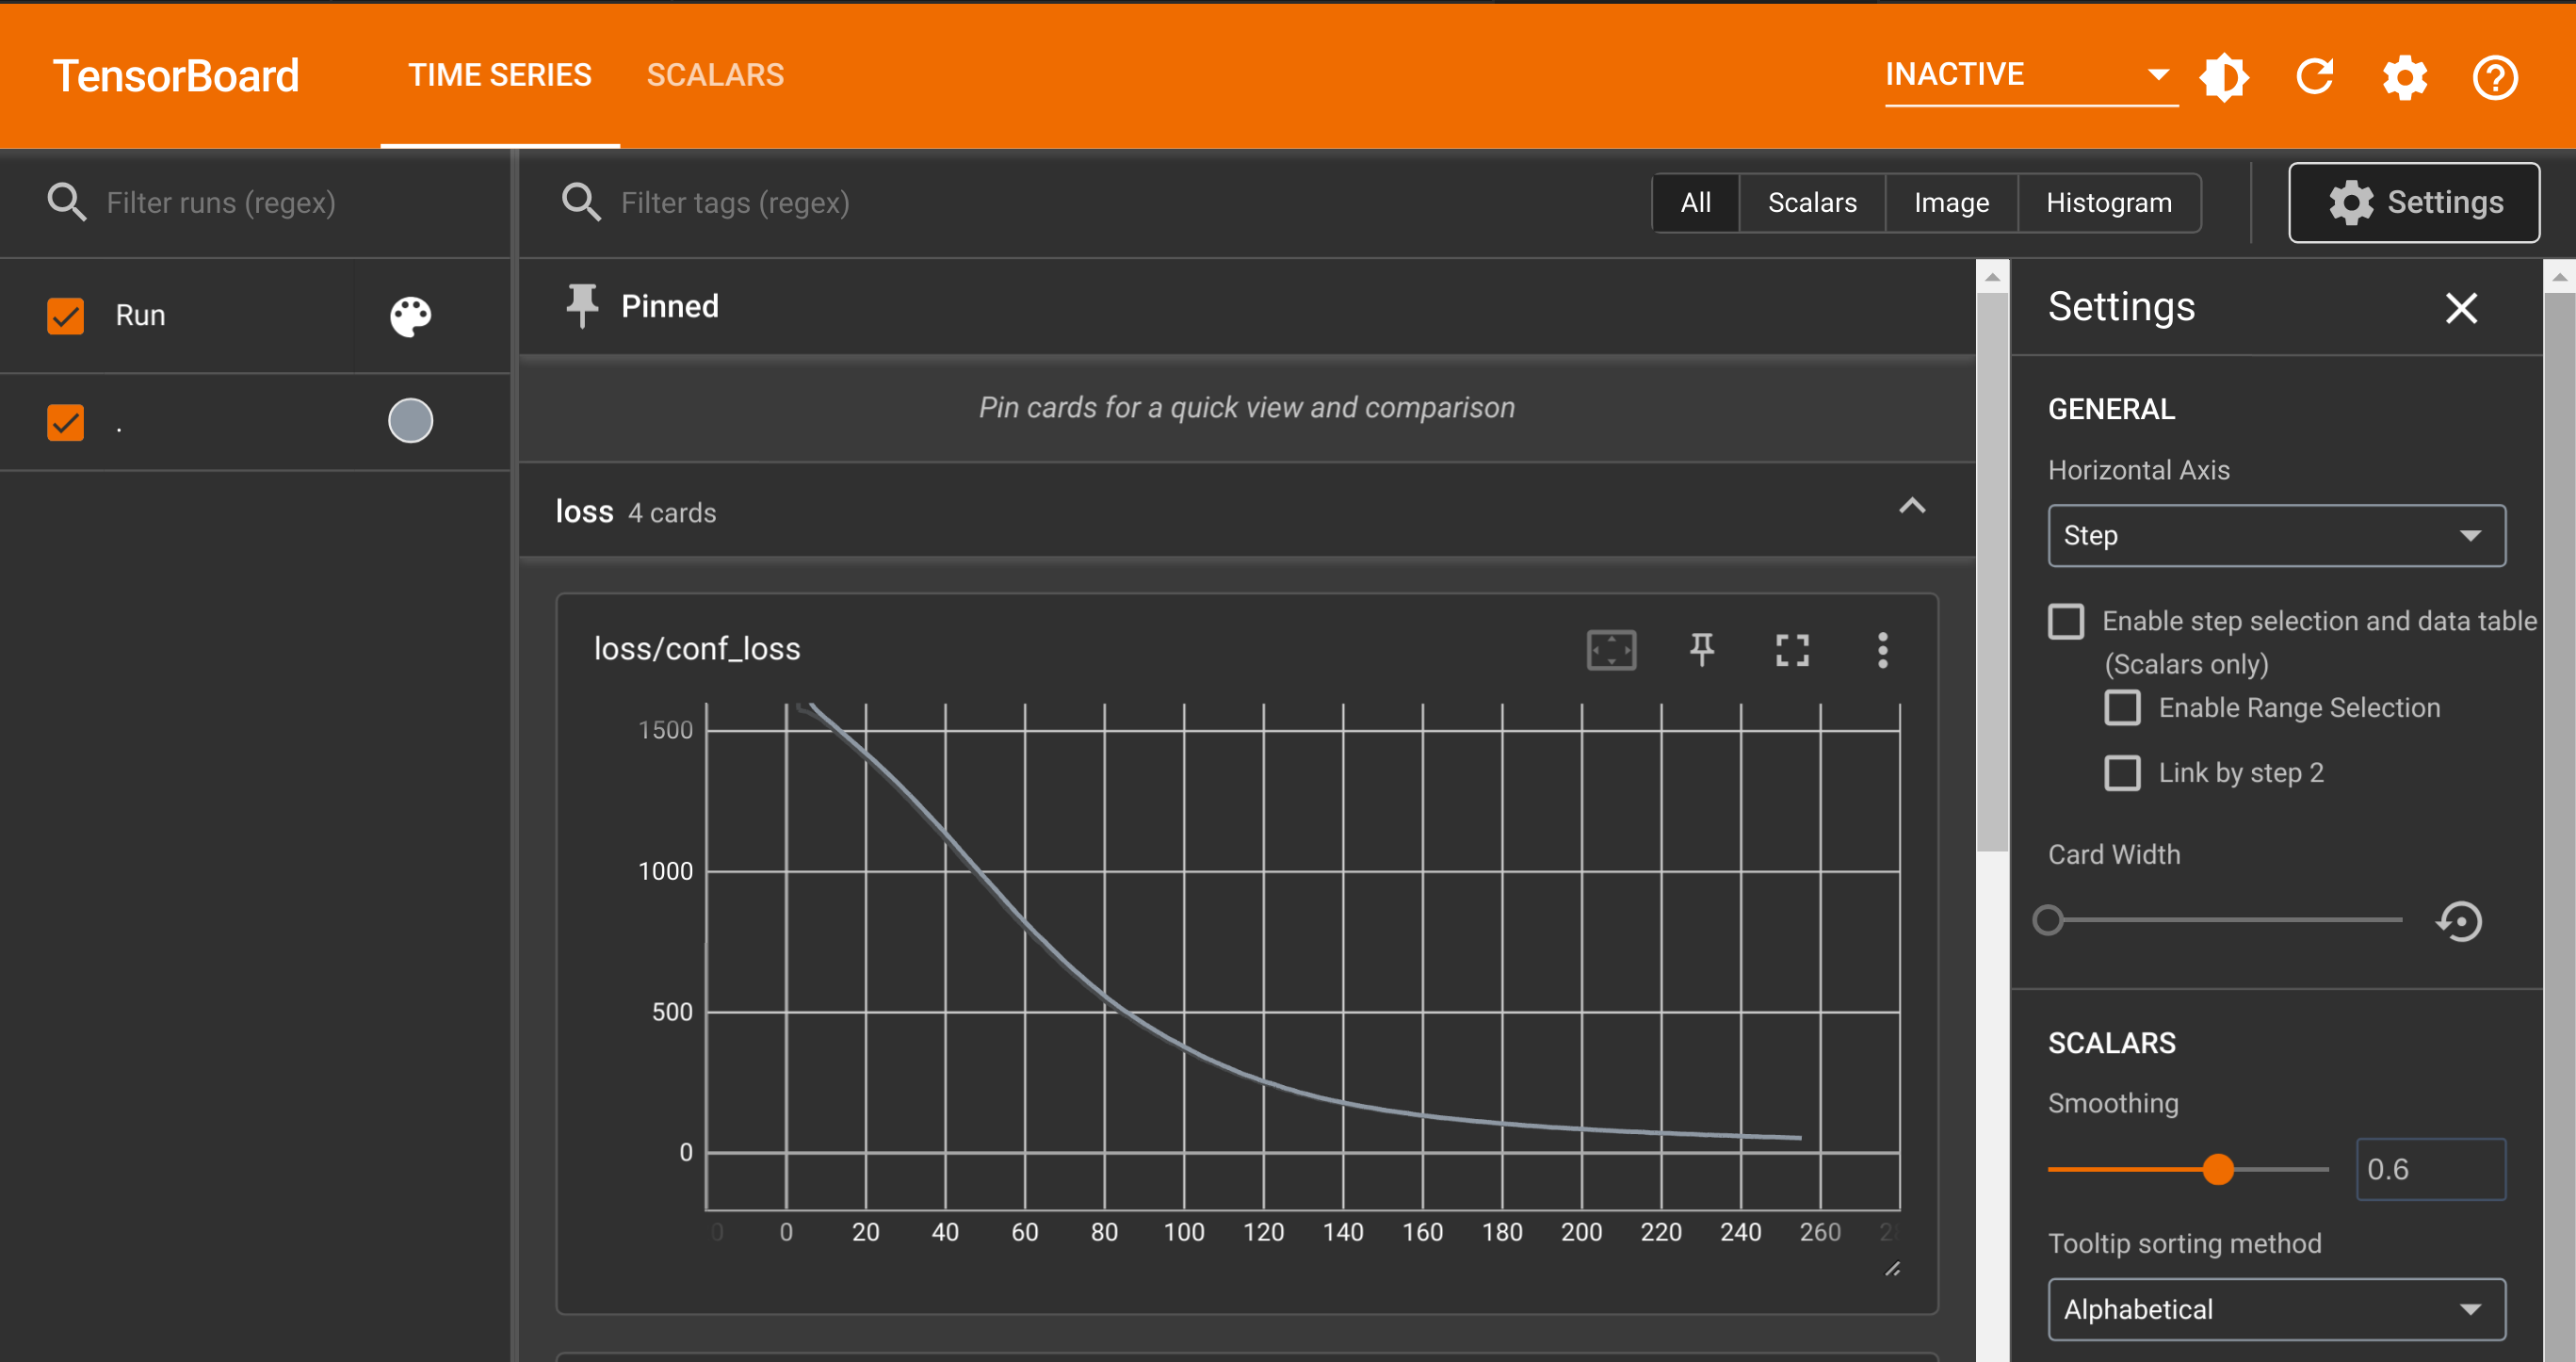

### Train the network

*   Change the following train options in the **configs.py** file in the yolov3 folder
```
TRAIN_YOLO_TINY = True
# Replace the batch size with smaller number if the GPU size is not sufficient 
TRAIN_BATCH_SIZE = 128
# Replace the train epochs with smaller number for faster training
TRAIN_EPOCHS = 50
```



*   Train the model using MNIST dataset

In [32]:
! python train.py

2023-12-03 11:06:17.969577: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-03 11:06:18.039070: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-03 11:06:18.381080: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-12-03 11:06:18.381109: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not l

*   If your tensorboard does not load, try to follow the following gif.

![](https://i.stack.imgur.com/ENl6b.gif)

In [31]:
# Visualize the training curves
# you can find the different loss curves by selecting custom scalars option
# in the top right drop down

%tensorboard --logdir /content/TensorFlow-2.x-YOLOv3/log/ --port 5060

*   Explain the loss used in YOLOv3

**Solution**

*(Double-click or enter to edit)*

...

### Predicting objects

*   Change the following option in the **detect_mnist.py** 
```
ID = random.randint(0, 50)  # depending on the number of images in test set
```
*   Change the following train options in the **configs.py** 
```
TRAIN_MODEL_NAME = f"{YOLO_TYPE}_custom_Tiny"
```

*   Run the detction script to find the outut

In [7]:
! python detect_mnist.py

# You will find the predictions file saved in the output path

2023-12-03 10:30:07.613216: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-03 10:30:07.683948: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-03 10:30:07.983820: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-12-03 10:30:07.983854: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not l

# Understanding Object Detection

*   What is the latest YOLO version available in literature? From the initial versions to the current version, what differences are made in each version?

**Solution**

*(Double-click or enter to edit)*

...

*   What are the other object detection frameworks available in the literature? 
*   How different are they compared with YOLO?

**Solution**

*(Double-click or enter to edit)*

...

*    What is the underlying algorithm behind YOLO? Explain each stage briefly.

**Solution**

*(Double-click or enter to edit)*

...

*   Explain the network architecture used in training YOLO

**Solution**

*(Double-click or enter to edit)*

...

*   What are the drawbacks in object detection frameworks?

**Solution**

*(Double-click or enter to edit)*

...


---

# **End of P9: Object Detection with YOLO**